In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Reading the dataset

In [2]:
df = pd.read_csv("Loan Prediction dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 2. Dealing with missing Values

## 2.1 Checking the number of missing values for each column

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 2.2 Filling in the missing values, by use of:
1. **Column Mean, for columns containg float64 and int64 datatypes**
2. **Column Mode, for columns containing object datatype**

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

## 2.3 Cross checking if the missing values have been filled

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 3. Checking for relationships among the features

## 3.1 Relationships of columns with numeric values

In [9]:
correlation = df.corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<Axes: >

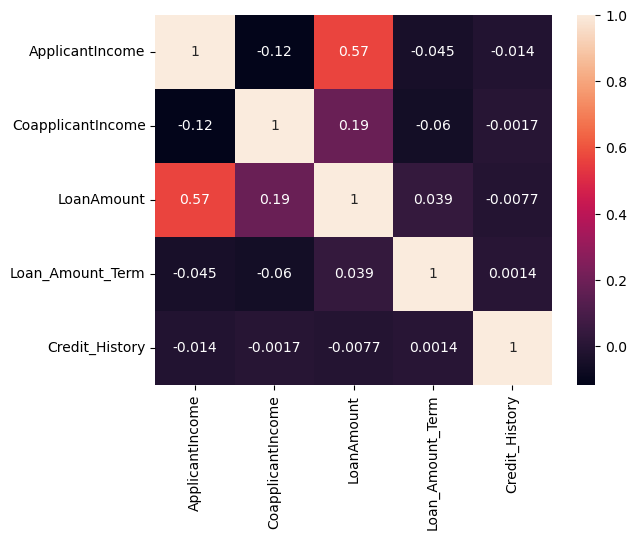

In [10]:
sns.heatmap(correlation, annot=True)

# 4. Applying Feature Engineering Techniques

## 4.1 Feature Combination

In [11]:
# combining CoapplicantIncome and ApplicantIncome 
df["Total_Applicant_Income"] = df['CoapplicantIncome'] + df['ApplicantIncome']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


## 4.2 Log Transform

In [12]:
df['TotalApplicantIncome_log'] = np.log(df['Total_Applicant_Income'])
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,TotalApplicantIncome_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,8.674026,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,8.430109,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,7.856707,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,7.972466,7.972466,4.262680,5.886104
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,8.320205,8.320205,3.688879,5.192957
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,9.025456,8.996157,5.533389,5.886104
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,8.933664,8.933664,5.231109,5.886104


### 4.2.1 Dropping the unnecessary columns

In [13]:
df.drop(columns=['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Applicant_Income'],
          inplace=True, axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,7.972466,4.262680,5.886104
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320205,8.320205,3.688879,5.192957
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,9.025456,8.996157,5.533389,5.886104
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,8.933664,5.231109,5.886104


# 4.3 Label encoding

In [14]:
label_encoder = LabelEncoder()
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for column in columns:
  df[column] = label_encoder.fit_transform(df[column])

df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,8.714568,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,8.505323,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972466,7.972466,4.262680,5.886104
610,1,1,3,0,0,1.0,0,1,8.320205,8.320205,3.688879,5.192957
611,1,1,1,0,0,1.0,2,1,9.025456,8.996157,5.533389,5.886104
612,1,1,2,0,0,1.0,2,1,8.933664,8.933664,5.231109,5.886104


In [15]:
df.dtypes

Gender                        int32
Married                       int32
Dependents                    int32
Education                     int32
Self_Employed                 int32
Credit_History              float64
Property_Area                 int32
Loan_Status                   int32
TotalApplicantIncome_log    float64
ApplicantIncome_log         float64
LoanAmount_log              float64
Loan_Amount_Term_log        float64
dtype: object

# 5. Training the model 

## 5.1 Splitting the data to Target variable and Indpendent variable

In [16]:
y = df['Loan_Status']
x = df.drop('Loan_Status', axis=1)

In [17]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [18]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalApplicantIncome_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,1.0,2,8.674026,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,8.714568,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,8.505323,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972466,7.972466,4.262680,5.886104
610,1,1,3,0,0,1.0,0,8.320205,8.320205,3.688879,5.192957
611,1,1,1,0,0,1.0,2,9.025456,8.996157,5.533389,5.886104
612,1,1,2,0,0,1.0,2,8.933664,8.933664,5.231109,5.886104


## 5.2 Splitting the data to training and testing 25 - 75

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

## 5.3 Logistic Regression

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_pred = logistic_model.predict(x_test)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
val_score_logistic = cross_val_score(logistic_model, x, y, cv = 5)

print(f'The accuracy is: {accuracy_logistic * 100: .2f}%\nThe Cross Val Score is: {val_score_logistic * 100}')

The accuracy is:  77.27%
The Cross Val Score is: [81.30081301 78.04878049 78.04878049 85.36585366 81.96721311]


## 5.4 Decion Tree Classifier

In [21]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
decision_tree_pred = decision_tree_model.predict(x_test)
accuracy_decision_tree = accuracy_score(y_test, decision_tree_pred)
val_score_tree = cross_val_score(decision_tree_model, x, y, cv = 5)

print(f'The accuracy is: {accuracy_decision_tree * 100: .2f}%\nThe cross val score is: {val_score_tree * 100}')

The accuracy is:  71.43%
The cross val score is: [65.85365854 70.73170732 67.4796748  75.6097561  77.04918033]


## 5.5 Random Forest Classifier

In [22]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)
accuracy_random_forest = accuracy_score(y_test, random_forest_pred)
val_score_forest = cross_val_score(random_forest_model, x, y, cv = 5)

print(f'The accuracy is: {accuracy_random_forest * 100: .2f}%\nThe cross val score is: {val_score_forest * 100}')

The accuracy is:  77.27%
The cross val score is: [77.23577236 74.79674797 78.86178862 82.92682927 78.68852459]


## 5.6 K-Nearest Neighbors Classifier

In [23]:
kn_model = KNeighborsClassifier()
kn_model.fit(x_train, y_train)
kn_pred = kn_model.predict(x_test)
accuracy_kn = accuracy_score(y_test, kn_pred)
val_score_kn = cross_val_score(kn_model, x, y, cv = 5)

print(f'The accuracy is: {accuracy_kn * 100: .2f}%\nThe cross val score: {val_score_kn * 100}')

The accuracy is:  72.08%
The cross val score: [76.42276423 75.6097561  73.98373984 76.42276423 75.40983607]


## 5.7 Create classification Report

In [24]:
# def create_classification_report(model, y_test, model_pred):
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.69      0.37      0.48        54
           1       0.73      0.91      0.81       100

    accuracy                           0.72       154
   macro avg       0.71      0.64      0.65       154
weighted avg       0.71      0.72      0.69       154



## - installing imblearn to reduce bias
### **Note:** *Might need to restart kernal for it to work*

In [25]:
# pip install -U imbalanced-learn

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
over_sampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = over_sampler.fit_resample(x, y)

df_resampled = pd.concat([pd.DataFrame(x_resampled), pd.Series(y_resampled)], axis=1)

In [28]:
x_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalApplicantIncome_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,1.000000,2,8.674026,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.000000,0,8.714568,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.000000,2,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.000000,2,8.505323,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.000000,2,8.699515,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292048,8.292048,4.986426,5.192957
840,1,1,1,0,0,0.842199,0,7.539027,7.539027,4.110874,5.886104
841,1,1,1,0,0,0.000000,0,8.456168,7.932721,4.983607,5.886104
842,1,1,2,1,0,0.000000,2,7.968666,7.968666,3.806662,5.192957


In [29]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [30]:
y_resampled.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [31]:
df_resampled.tail(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalApplicantIncome_log,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Loan_Status
834,0,1,0,1,0,0.000000,1,8.591558,7.672758,5.181784,5.886104,0
835,1,1,1,0,0,0.000000,1,8.382289,8.035603,4.795791,5.886104,0
836,1,1,0,1,0,0.000000,2,8.473659,7.805475,5.198497,5.886104,0
837,1,0,0,0,0,1.000000,0,9.157045,8.668196,5.739793,5.886104,0
838,1,0,0,0,0,1.000000,0,9.157045,8.668196,5.739793,5.886104,0
839,1,1,3,1,0,1.000000,2,8.292048,8.292048,4.986426,5.192957,0
840,1,1,1,0,0,0.842199,0,7.539027,7.539027,4.110874,5.886104,0
841,1,1,1,0,0,0.000000,0,8.456168,7.932721,4.983607,5.886104,0
842,1,1,2,1,0,0.000000,2,7.968666,7.968666,3.806662,5.192957,0
843,1,0,0,0,0,0.000000,1,8.334712,8.334712,4.584967,5.886104,0


In [32]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=42)

In [33]:
logistic_model_bal = LogisticRegression()

logistic_model_bal.fit(x_resampled_train, y_resampled_train)
logistic_model_bal_pred = logistic_model_bal.predict(x_resampled_test)

accuracy_logistic_model_bal = accuracy_score(y_resampled_test, logistic_model_bal_pred)
cross_val_logistic_model_bal = cross_val_score(logistic_model_bal, x_resampled, y_resampled, cv = 5)

print(f'The accuracy is: {accuracy_logistic_model_bal * 100: .2f}%\nThe cross val score is: {cross_val_logistic_model_bal * 100}')

The accuracy is:  69.67%
The cross val score is: [69.23076923 73.96449704 73.37278107 71.00591716 70.83333333]


In [34]:
decision_tree_model_bal = DecisionTreeClassifier()

decision_tree_model_bal.fit(x_resampled_train, y_resampled_train)
decision_tree_model_bal_pred = decision_tree_model_bal.predict(x_resampled_test)

accuracy_decision_tree_model_bal = accuracy_score(y_resampled_test, decision_tree_model_bal_pred)
cross_val_decision_tree_model_bal = cross_val_score(decision_tree_model_bal, x_resampled, y_resampled, cv=5)

print(f'The accuracy is: {accuracy_decision_tree_model_bal * 100: .2f}%\nThe cross val score is: {cross_val_decision_tree_model_bal}')

The accuracy is:  82.94%
The cross val score is: [0.78698225 0.81065089 0.88757396 0.88757396 0.88690476]


In [35]:
random_forest_model_bal = RandomForestClassifier()

random_forest_model_bal.fit(x_resampled_train, y_resampled_train)
random_forest_model_bal_pred = random_forest_model_bal.predict(x_resampled_test)

accuracy_forest_bal = accuracy_score(y_resampled_test, random_forest_model_bal_pred)
cross_val_forest_bal = cross_val_score(random_forest_model_bal, x_resampled, y_resampled)

print(f'The accuracy is: {accuracy_forest_bal * 100: .2f}%\nThe cross val score: {cross_val_forest_bal * 100}')

The accuracy is:  87.68%
The cross val score: [84.61538462 86.98224852 91.71597633 91.71597633 94.64285714]


In [36]:
kn_model_bal = KNeighborsClassifier()

kn_model_bal.fit(x_resampled_train, y_resampled_train)
kn_model_bal_pred = kn_model_bal.predict(x_resampled_test)

accuracy_kn_model_bal = accuracy_score(y_resampled_test, kn_model_bal_pred)
cross_val_kn_model_bal = cross_val_score(kn_model_bal, x_resampled, y_resampled, cv = 5)

print(f'The accuracy is: {accuracy_kn_model_bal * 100: .2f}%\nThe cross val score is: {cross_val_kn_model_bal * 100}')

The accuracy is:  72.99%
The cross val score is: [72.78106509 73.96449704 68.04733728 75.14792899 77.38095238]


In [44]:
def create_report(model, y_test, y_pred):
  print(f"The classification report of {model}:\n{classification_report(y_test, y_pred)}\n")

create_report(random_forest_model_bal, y_resampled_test, random_forest_model_bal_pred)
create_report(logistic_model_bal, y_resampled_test, logistic_model_bal_pred)
create_report(decision_tree_model_bal, y_resampled_test, decision_tree_model_bal_pred)
create_report(kn_model_bal, y_resampled_test, kn_model_bal_pred)

The classification report of RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       114
           1       0.84      0.90      0.87        97

    accuracy                           0.88       211
   macro avg       0.88      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211


The classification report of LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


The classification report of DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       114
           1       0.83      0.79      0.81        97

    accuracy       

# **Conclusion**: ***In this case we can see that the Random Forest Model is the one that is performing well so that is the one to be Chosen***

In [39]:
joblib.dump(random_forest_model_bal, "loan_prediction_model.pkl")

['loan_prediction_model.pkl']